733
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.

<IPython.core.display.Javascript object>


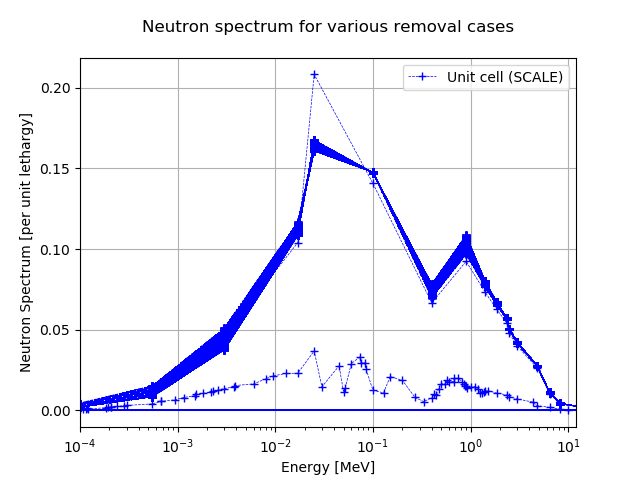

In [25]:
%matplotlib notebook 
# Import modules
import numpy as np
import matplotlib.pyplot
from pyne import serpent
from pyne import nucname
from scipy.stats.stats import pearsonr 
import scipy.integrate as inte
from sklearn.metrics import mean_squared_error
from math import sqrt

# SCALE output 
filename = '/home/andrei2/Desktop/ornl/msfr/scale/th_feed_60yrs/msfr_all_removal_th_feed_60yrs.out'
start = "No    Energy(eV)   Flux       Flux      Adj.Flux   Adj.Flux"
stop  = "NOTE: Flux values above are per unit-lethargy."
#spectrum_grid_eq = det10['DETavrg']
#spectrum_grid_I = det0['DET1']
#spectrum_grid_II = det0['DET2']
#energy = energy_grid[:,2]
#flux_spectrum = spectrum_grid[:,10]
#print list(det0.keys())
#print np.amax(spectrum_grid[:,10])
#print np.sum(spectrum_grid[:,10])
#print np.trapz(spectrum_grid[:,10],energy)
#y = spectrum_grid[:,10]/np.trapz(spectrum_grid[:,10],energy)

def read_scale_out (filename):
    group_n = []
    upp_enrg = []
    flux_list = []
    count = 0
    u_en = np.zeros((735,239))
    with open(filename,'r') as infile:
        copy = False
        for line in infile:
            if line.strip() == start:
                copy = True
            elif line.strip() == stop:
                copy = False
                count += 1
            elif copy:
                p = line.strip().split()
                if p != []:
                    group_n.append(float(p[0]))
                    upp_enrg.append(float(p[1]))  
                    flux_list.append(float(p[2]))                
    u_en = 1e-6* np.flip (np.array (upp_enrg, dtype=float), 0 )               # Convert eV to MeV
    flux = np.flip ( np.array (flux_list, dtype=float), 0 )
    num_gr = len (u_en)
    group = np.array(group_n, dtype=int)
    print (count)
    print (group_n)
    print (u_en)
    print (flux)
    return u_en, flux, num_gr

ene_grid_sc, neutron_flux_sc, num_groups = read_scale_out (filename)
print (neutron_flux_sc.shape)
# Initialize figure
fig_1 = matplotlib.pyplot.figure(1)
ax = fig_1.add_subplot(111)
ax.grid(True)
#ax.set_ylim([0,10])
ax.set_xlim([1e-4,12])
ax.semilogx(ene_grid_sc, neutron_flux_sc, '+--', label='Unit cell (SCALE)', color='blue', linewidth=0.5)
ax.set_title('Neutron spectrum for various removal cases\n')
ax.legend(loc=0)
ax.set_ylabel('Neutron Spectrum [per unit lethargy]')
#ax.set_ylabel('Relative error, %')
ax.set_xlabel('Energy [MeV]')
#ax.set_title(plot_title)
fig_1.show()
#fig_1.savefig('full_vs_unit_spectrum_238groups.png',bbox_inches='tight', dpi=700)
#fig_1.savefig('spectrum_boc_eoc_vol_gas_vs_allremovals.png',bbox_inches='tight', dpi=1000)
#fig_1.savefig('/home/andrei2/Desktop/git/pres/2018-rykh-seminar/images/spectrum.png',bbox_inches='tight', dpi=1000)